In [ ]:
import tensorflow as tf
import keras

from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# Set the image size
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Create an ImageDataGenerator for data preprocessing and augmentation
#datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Specify the target image size
target_size = (IMG_HEIGHT, IMG_WIDTH)  # Adjust based on your model's input size requirements


In [ ]:
# Create a tf.data.Dataset for the training set
train_data = tf.keras.utils.image_dataset_from_directory(
    '/home/giuseppe/archive', #Use your path for archive
    labels='inferred',
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    validation_split=0.2,#0.2
    subset="training",
    seed=1337  # for reproducibility
)

# Create a tf.data.Dataset for the validation set
val_data = tf.keras.utils.image_dataset_from_directory(
    '/home/giuseppe/archive', #Use your path for archive
    labels='inferred',
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size= BATCH_SIZE,
    validation_split=0.2,
    subset="validation",
    seed=1337  # for reproducibility
)

Found 1655 files belonging to 6 classes.
Using 1324 files for training.
Found 1655 files belonging to 6 classes.
Using 331 files for validation.


In [ ]:
# Print the shape of a batch from the training dataset
for images, labels in train_data.take(1):
    print("Training Batch Shape - Images:", images.shape, "Labels:", labels.shape)

# Print the shape of a batch from the validation dataset
for images, labels in val_data.take(1):
    print("Validation Batch Shape - Images:", images.shape, "Labels:", labels.shape)

Training Batch Shape - Images: (32, 150, 150, 3) Labels: (32, 6)
Validation Batch Shape - Images: (32, 150, 150, 3) Labels: (32, 6)


In [ ]:
class_names = train_data.class_names
print(class_names)

['fresh_peaches_done', 'fresh_pomegranates_done', 'fresh_strawberries_done', 'rotten_peaches_done', 'rotten_pomegranates_done', 'rotten_strawberries_done']


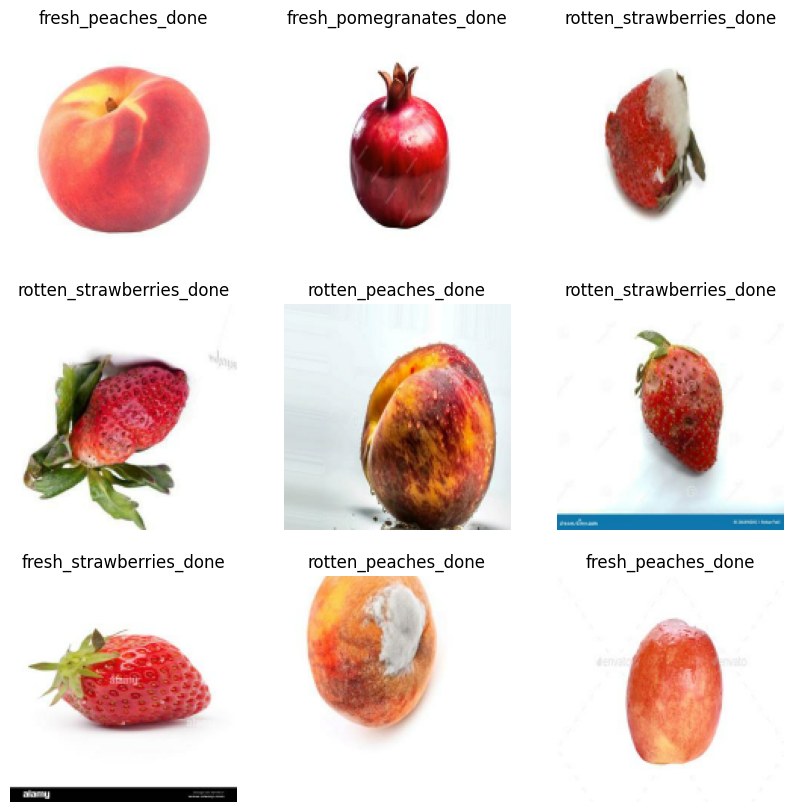

In [ ]:
# Assuming you have 'train_data' and 'labels' variables from your project
plt.figure(1, figsize=(10, 10))

# Loop over the first batch of the training dataset
for x_batch, y_batch in train_data.take(1):
    # Loop over the first 9 images in the batch
    for i in range(9):
        # Create a subplot in a 3x3 grid
        ax = plt.subplot(3, 3, i + 1)

        # Display the image (convert to uint8 for proper display)
        plt.imshow(x_batch[i].numpy().astype("uint8"))

        # Set the title of the subplot with the corresponding label
        plt.title(class_names[np.argmax(y_batch[i, :])])

        # Turn off axis labels for cleaner display
        plt.axis("off")

# Show the plot
plt.show()

In [ ]:
def plot_performance(history, epochs, interval,types):
    # Create a 1x2 subplot layout
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Set the title for the entire figure
    t = f.suptitle(types, fontsize=12)

    # Adjust the spacing between subplots
    f.subplots_adjust(top=0.85, wspace=0.3)

    # Generate a list of epoch numbers
    epoch_list = list(range(1, epochs + 1))

    # Plot training and validation accuracy
    ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
    ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_xticks(np.arange(0, epochs + 1, interval))
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    # Plot training and validation loss
    ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
    ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
    ax2.set_xticks(np.arange(0, epochs + 1, interval))
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")

In [ ]:
# Function to separate images and labels from a dataset
def separate_images_labels(dataset):
    images = []
    labels = []
    for image_batch, label_batch in dataset:
        images.extend(image_batch.numpy())
        labels.extend(label_batch.numpy())
    return np.array(images), np.array(labels)

# Separating images and labels for training data
train_images, train_labels = separate_images_labels(train_data)

# Separating images and labels for validation data
val_images, val_labels = separate_images_labels(val_data)
# Verificando o formato dos rótulos
print("Formato dos rótulos de treinamento:", train_labels.shape)
print("Formato dos rótulos de validação:", val_labels.shape)

Formato dos rótulos de treinamento: (1324, 6)
Formato dos rótulos de validação: (331, 6)


In [ ]:
# Function to visualize pixel values of an image
def visualize_pixel_values(image, label):
    # Print the pixel values as a NumPy array
    print("Pixel Values:")
    print(image)

# Visualize pixel values of the first image in the training dataset
for images, labels in train_data.take(1):
    visualize_pixel_values(images[0].numpy(), labels[0].numpy())

Pixel Values:
[[[255.  255.  255. ]
  [255.  255.  255. ]
  [255.  255.  255. ]
  ...
  [255.  255.  255. ]
  [255.  255.  255. ]
  [255.  255.  255. ]]

 [[255.  255.  255. ]
  [255.  255.  255. ]
  [255.  255.  255. ]
  ...
  [255.  255.  255. ]
  [255.  255.  255. ]
  [255.  255.  255. ]]

 [[255.  255.  255. ]
  [255.  255.  255. ]
  [255.  255.  255. ]
  ...
  [255.  255.  255. ]
  [255.  255.  255. ]
  [255.  255.  255. ]]

 ...

 [[250.5 250.5 248.5]
  [250.  250.  248. ]
  [249.  249.  247. ]
  ...
  [252.  252.  250. ]
  [253.  253.  251. ]
  [253.  253.  251. ]]

 [[251.  251.  249. ]
  [251.  251.  249. ]
  [251.  251.  249. ]
  ...
  [252.  252.  250. ]
  [253.  253.  251. ]
  [253.  253.  251. ]]

 [[251.  251.  249. ]
  [251.  251.  249. ]
  [251.  251.  249. ]
  ...
  [252.  252.  250. ]
  [253.  253.  251. ]
  [253.  253.  251. ]]]


In [ ]:
# Apply rescaling within the dataset using map
train_data = train_data.map(lambda x, y: (x / 255.0, y))
# Apply rescaling within the dataset using map
val_data = val_data.map(lambda x, y: (x / 255.0, y))

Pixel Values:
[[[0.69215685 0.69215685 0.69215685]
  [0.69411767 0.69411767 0.69411767]
  [0.69803923 0.69803923 0.69803923]
  ...
  [0.7254902  0.7254902  0.7254902 ]
  [0.7254902  0.7254902  0.7254902 ]
  [0.7254902  0.7254902  0.7254902 ]]

 [[0.69215685 0.69215685 0.69215685]
  [0.69411767 0.69411767 0.69411767]
  [0.69803923 0.69803923 0.69803923]
  ...
  [0.7254902  0.7254902  0.7254902 ]
  [0.7254902  0.7254902  0.7254902 ]
  [0.7254902  0.7254902  0.7254902 ]]

 [[0.69215685 0.69215685 0.69215685]
  [0.69411767 0.69411767 0.69411767]
  [0.69803923 0.69803923 0.69803923]
  ...
  [0.7254902  0.7254902  0.7254902 ]
  [0.7254902  0.7254902  0.7254902 ]
  [0.7254902  0.7254902  0.7254902 ]]

 ...

 [[0.7607843  0.7607843  0.7607843 ]
  [0.76666665 0.76666665 0.76666665]
  [0.7705882  0.7705882  0.7705882 ]
  ...
  [0.6284314  0.6284314  0.6284314 ]
  [0.62941176 0.62941176 0.62941176]
  [0.6313726  0.6313726  0.6313726 ]]

 [[0.75490195 0.75490195 0.75490195]
  [0.7588235  0.7588235

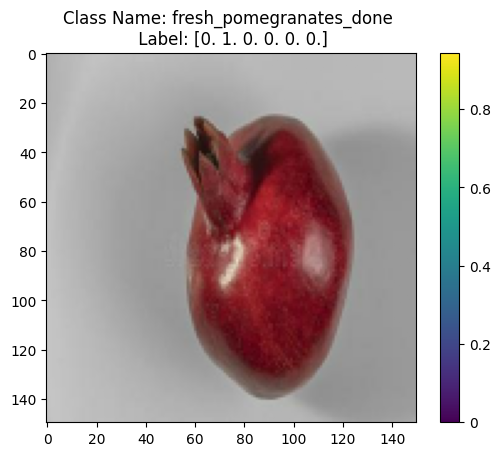

In [ ]:
# Function to visualize pixel values of an image
def visualize_pixel_values(image, label):
    # Print the pixel values as a NumPy array
    print("Pixel Values:")
    print(image)

    # Display the image with a colorbar
    plt.imshow(image)

    # Convert the label to the corresponding class name
    class_name = class_names[np.argmax(label)]

    #plt.title(f"Label: {label}")
    plt.title(f"Class Name: {class_name} \n Label: {label}")
    plt.colorbar(format="%g")  # Add a colorbar with pixel values
    plt.show()

# Visualize pixel values of the first image in the training dataset
for images, labels in train_data.take(1):
    visualize_pixel_values(images[0].numpy(), labels[0].numpy())

In [ ]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=4)

In [ ]:
batch_size = 16
epochs = 30
input_shape = (150, 150, 3)

In [ ]:
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, Rescaling

## Basic CNN


In [ ]:
# Define model architecture
model = Sequential()


# Add Convolutional layers

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


# Flatten the output and add Dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))  # Assuming 6 classes for fruits


# Print model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 17, 17, 64)       

In [ ]:
from keras.optimizers import Adam
model.compile(
              loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit(train_images,train_labels,
                    validation_data=(val_images, val_labels),
                    batch_size=batch_size,
                    epochs= epochs,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/30
83/83 [==============================] - 5s 51ms/step - loss: 2.1564 - accuracy: 0.3708 - val_loss: 1.6027 - val_accuracy: 0.4894
Epoch 2/30
83/83 [==============================] - 4s 51ms/step - loss: 1.0676 - accuracy: 0.5846 - val_loss: 1.0681 - val_accuracy: 0.6042
Epoch 3/30
83/83 [==============================] - 4s 51ms/step - loss: 0.8023 - accuracy: 0.6941 - val_loss: 0.9543 - val_accuracy: 0.6495
Epoch 4/30
83/83 [==============================] - 4s 47ms/step - loss: 0.6568 - accuracy: 0.7636 - val_loss: 0.7909 - val_accuracy: 0.6949
Epoch 5/30
83/83 [==============================] - 4s 45ms/step - loss: 0.6276 - accuracy: 0.7817 - val_loss: 0.7479 - val_accuracy: 0.7221
Epoch 6/30
83/83 [==============================] - 4s 50ms/step - loss: 0.4458 - accuracy: 0.8610 - val_loss: 0.8407 - val_accuracy: 0.6707
Epoch 7/30
83/83 [==============================] - 4s 48ms/step - loss: 0.4379 - accuracy: 0.8361 - val_loss: 0.8542 - val_accuracy: 0.7009
Epoch 8/30
83

In [ ]:
from sklearn.metrics import confusion_matrix

# Obtain model predictions for the validation set as probabilities
y_pred_probs = model.predict(val_images)

# Convert probabilities into labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Transform true labels back to the original format (one-hot encoded for single class)
y_true = np.argmax(val_labels, axis=1)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#import seaborn as sns
import matplotlib.pyplot as plt

def display_model_performance_metrics(true_labels, predicted_labels, classes, title):
    # Calculate performance metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1))

    # Calculate and display the confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix - ' + title)
    plt.show()

11/11 [==============================] - 0s 25ms/step


Accuracy: 0.73
Precision: 0.75
Recall: 0.73
F1 Score: 0.73


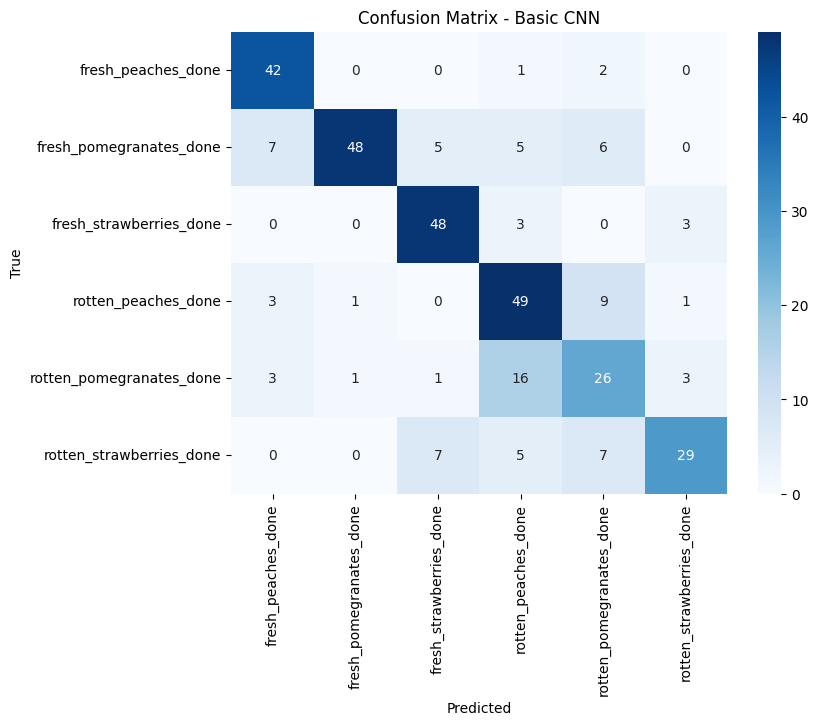

<Figure size 640x480 with 0 Axes>

In [ ]:
display_model_performance_metrics(y_true,y_pred,class_names,'Basic CNN')
plt.savefig('Basic CNN confusion matrix')

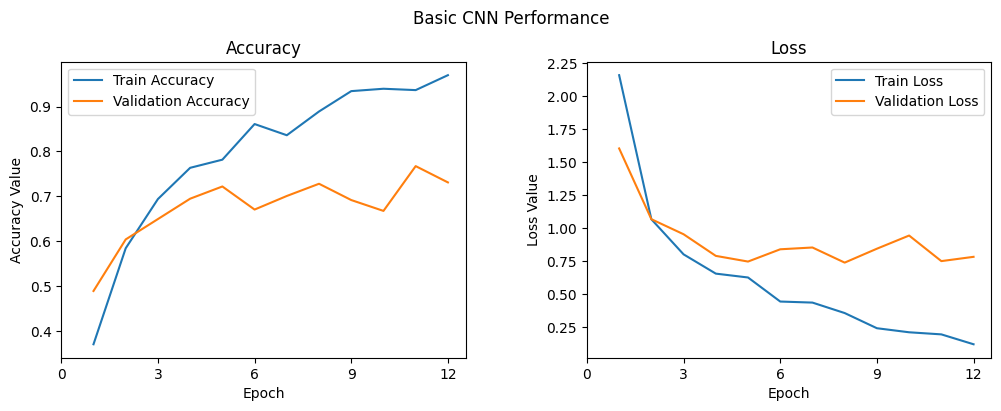

In [ ]:
plot_performance(history, len(history.history['loss']), 3,'Basic CNN Performance')
plt.savefig('Basic CNN plots')

## CNN with regularization

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.0001),
              metrics=['accuracy'])


history = model.fit(train_images,train_labels,
                    validation_data=(val_images, val_labels),
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                   callbacks=[early_stop])

Epoch 1/30
83/83 [==============================] - 5s 54ms/step - loss: 3.7199 - accuracy: 0.2100 - val_loss: 1.4859 - val_accuracy: 0.4048
Epoch 2/30
83/83 [==============================] - 5s 56ms/step - loss: 1.6418 - accuracy: 0.3459 - val_loss: 1.3636 - val_accuracy: 0.5045
Epoch 3/30
83/83 [==============================] - 4s 54ms/step - loss: 1.5252 - accuracy: 0.3905 - val_loss: 1.3262 - val_accuracy: 0.4532
Epoch 4/30
83/83 [==============================] - 4s 52ms/step - loss: 1.4458 - accuracy: 0.4335 - val_loss: 1.2324 - val_accuracy: 0.5076
Epoch 5/30
83/83 [==============================] - 4s 54ms/step - loss: 1.3401 - accuracy: 0.4721 - val_loss: 1.1625 - val_accuracy: 0.5921
Epoch 6/30
83/83 [==============================] - 4s 53ms/step - loss: 1.2351 - accuracy: 0.5295 - val_loss: 1.0669 - val_accuracy: 0.5831
Epoch 7/30
83/83 [==============================] - 5s 55ms/step - loss: 1.1902 - accuracy: 0.5370 - val_loss: 1.0835 - val_accuracy: 0.5770
Epoch 8/30
83

In [ ]:
# Obtain model predictions for the validation set as probabilities
y_pred_probs = model.predict(val_images)

# Convert probabilities into labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Transform true labels back to the original format (one-hot encoded for single class)
y_true = np.argmax(val_labels, axis=1)


11/11 [==============================] - 0s 25ms/step


Accuracy: 0.71
Precision: 0.73
Recall: 0.71
F1 Score: 0.72


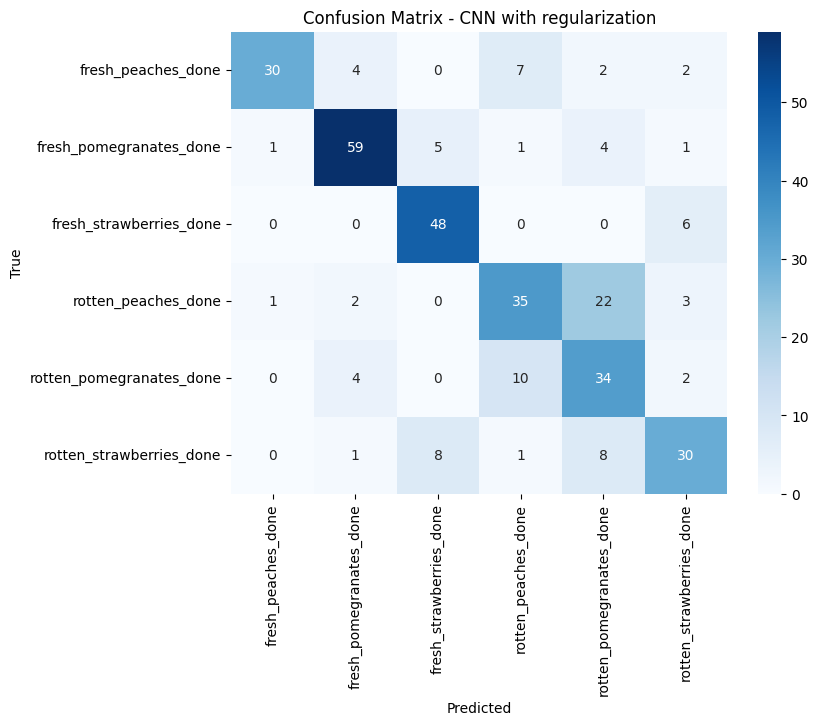

<Figure size 640x480 with 0 Axes>

In [ ]:
display_model_performance_metrics(y_true,y_pred,class_names,'CNN with regularization')
plt.savefig('CNN with regularization confusion matrix')

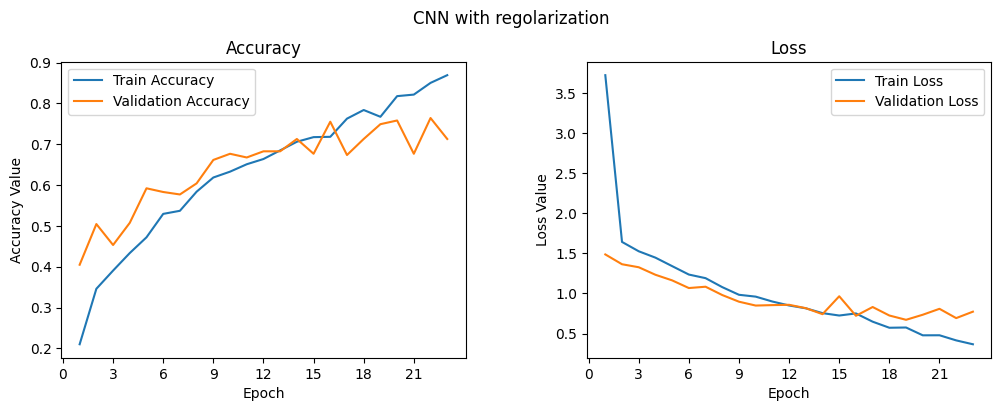

In [ ]:
plot_performance(history, len(history.history['loss']), 3,'CNN with regolarization')
plt.savefig('CNN with regularization plots')

## CNN with image augmentation

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
def img_generator(img_id):
    img_generator = train_datagen.flow(train_images[img_id:img_id+1], train_labels[img_id:img_id+1],
                                       batch_size=1)
    img = [next(img_generator) for i in range(0,5)]
    fig, ax = plt.subplots(1,5, figsize=(16, 6))
    print('Labels:', [item[1][0] for item in img])
    l = [ax[i].imshow(img[i][0][0].astype('uint8')) for i in range(0,5)]

Labels: [array([0., 0., 0., 0., 0., 1.], dtype=float32), array([0., 0., 0., 0., 0., 1.], dtype=float32), array([0., 0., 0., 0., 0., 1.], dtype=float32), array([0., 0., 0., 0., 0., 1.], dtype=float32), array([0., 0., 0., 0., 0., 1.], dtype=float32)]


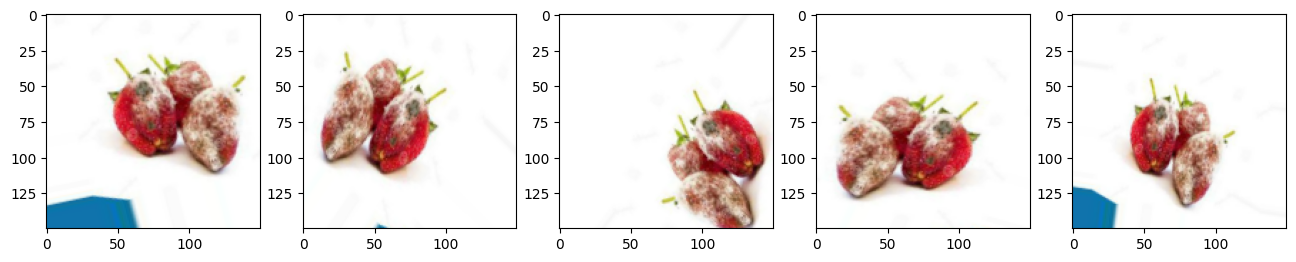

In [ ]:
img_generator(1)

In [ ]:

train_generator = train_datagen.flow(train_images, train_labels, batch_size=7) # Tamanho do lote definido como 32
val_generator = val_datagen.flow(val_images, val_labels, batch_size=2)

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.0001),
              metrics=['accuracy'])

# Determine steps_per_epoch based on the size of your dataset and the batch size
steps_per_epoch = len(train_images) // batch_size
validation_steps = len(val_images) // batch_size

# Train the model
history = model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=30,
                    validation_data=val_generator, validation_steps=validation_steps,
                    verbose=1, callbacks=[early_stop])

Epoch 1/30
82/82 [==============================] - 4s 41ms/step - loss: 3.9183 - accuracy: 0.2021 - val_loss: 1.7889 - val_accuracy: 0.4500
Epoch 2/30
82/82 [==============================] - 3s 40ms/step - loss: 1.9742 - accuracy: 0.2718 - val_loss: 1.7884 - val_accuracy: 0.5000
Epoch 3/30
82/82 [==============================] - 3s 39ms/step - loss: 1.6903 - accuracy: 0.3539 - val_loss: 1.7878 - val_accuracy: 0.2250
Epoch 4/30
82/82 [==============================] - 3s 40ms/step - loss: 1.5831 - accuracy: 0.3589 - val_loss: 1.7887 - val_accuracy: 0.3250
Epoch 5/30
82/82 [==============================] - 3s 37ms/step - loss: 1.4858 - accuracy: 0.4024 - val_loss: 1.7869 - val_accuracy: 0.2500
Epoch 6/30
82/82 [==============================] - 3s 37ms/step - loss: 1.3633 - accuracy: 0.4542 - val_loss: 1.7860 - val_accuracy: 0.2250
Epoch 7/30
82/82 [==============================] - 3s 36ms/step - loss: 1.3572 - accuracy: 0.4454 - val_loss: 1.7871 - val_accuracy: 0.1500
Epoch 8/30
82

In [ ]:
model.save('fruits_cnn_img_aug.h5') #save the model

/home/giuseppe/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Obtain model predictions for the validation set as probabilities
y_pred_probs = model.predict(val_images)

# Convert probabilities into labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Transform true labels back to the original format (one-hot encoded for single class)
y_true = np.argmax(val_labels, axis=1)

11/11 [==============================] - 0s 25ms/step


Accuracy: 0.67
Precision: 0.70
Recall: 0.67
F1 Score: 0.67


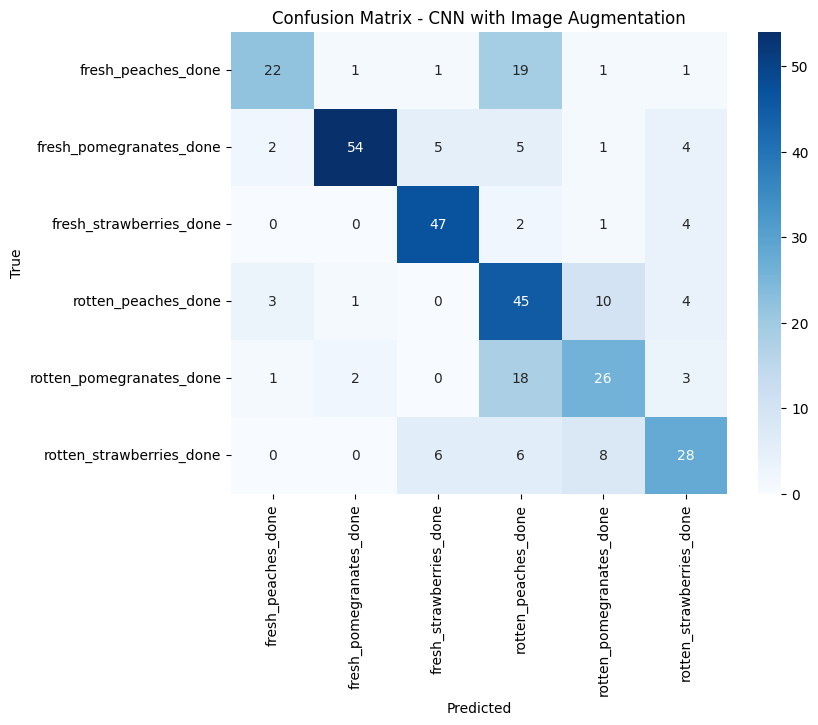

<Figure size 640x480 with 0 Axes>

In [ ]:
display_model_performance_metrics(y_true,y_pred,class_names,'CNN with Image Augmentation')
plt.savefig('Image Augmentation confusion matrix')

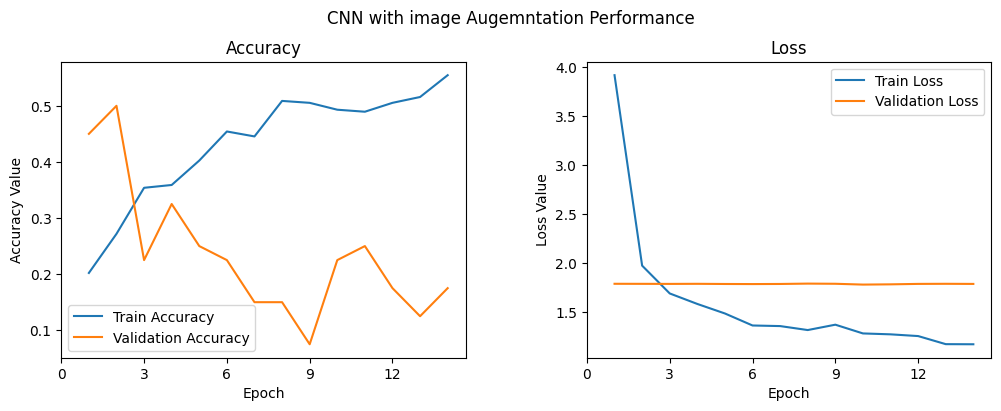

In [ ]:
plot_performance(history, len(history.history['loss']), 3,'CNN with image Augemntation Performance')
plt.savefig('Image_Augmentation plots')

## Pre-Trained model as a feature extraction

In [ ]:
from tensorflow.keras.applications import VGG16
from keras.applications import vgg16


vgg = vgg16.VGG16(include_top=False, weights='imagenet',
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

import pandas as pd
pd.set_option('max_colwidth', 100)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer object at 0x7f4f3cf84e50>,input_1,False
1,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f4f3c822ee0>,block1_conv1,False
2,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f4f2495de50>,block1_conv2,False
3,<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f4f2523ac40>,block1_pool,False
4,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f50141c80a0>,block2_conv1,False
5,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f4f3c829ee0>,block2_conv2,False
6,<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f4ffc0bd970>,block2_pool,False
7,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f4f3c829580>,block3_conv1,False
8,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f4ffc0bd8b0>,block3_conv2,False
9,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f4ffc0bd610>,block3_conv3,False


In [ ]:
def get_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features

train_features_vgg = get_features(vgg_model, train_images)
validation_features_vgg = get_features(vgg_model, val_images)

print('Train Bottleneck Features:', train_features_vgg.shape,
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (1324, 8192) 	Validation Bottleneck Features: (331, 8192)


In [ ]:
input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(32, activation='relu', input_dim=input_shape))
model.add(Dropout(0.1))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                262176    
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 6)                 198       
                                                                 
Total params: 262374 (1.00 MB)
Trainable params: 262374 (1.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(input_shape)
history = model.fit(x=train_features_vgg, y=train_labels,
                    validation_data=(validation_features_vgg, val_labels),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,callbacks=[early_stop])

8192
Epoch 1/30
83/83 [==============================] - 1s 4ms/step - loss: 2.9105 - accuracy: 0.4063 - val_loss: 1.3723 - val_accuracy: 0.4924
Epoch 2/30
83/83 [==============================] - 0s 2ms/step - loss: 1.1931 - accuracy: 0.5831 - val_loss: 1.3876 - val_accuracy: 0.6163
Epoch 3/30
83/83 [==============================] - 0s 3ms/step - loss: 1.0118 - accuracy: 0.6042 - val_loss: 1.1489 - val_accuracy: 0.7039
Epoch 4/30
83/83 [==============================] - 0s 3ms/step - loss: 0.9004 - accuracy: 0.6571 - val_loss: 1.0975 - val_accuracy: 0.6344
Epoch 5/30
83/83 [==============================] - 0s 2ms/step - loss: 0.8408 - accuracy: 0.6722 - val_loss: 1.0465 - val_accuracy: 0.6949
Epoch 6/30
83/83 [==============================] - 0s 2ms/step - loss: 0.7359 - accuracy: 0.7228 - val_loss: 1.0385 - val_accuracy: 0.7100
Epoch 7/30
83/83 [==============================] - 0s 3ms/step - loss: 0.6353 - accuracy: 0.7394 - val_loss: 0.9866 - val_accuracy: 0.7492
Epoch 8/30
83/8

In [ ]:
# Obtain model predictions for the validation set as probabilities
y_pred_probs = model.predict(validation_features_vgg)

# Convert probabilities into labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Transform true labels back to the original format (one-hot encoded for single class)
y_true = np.argmax(val_labels, axis=1)

11/11 [==============================] - 0s 1ms/step


Accuracy: 0.76
Precision: 0.77
Recall: 0.76
F1 Score: 0.76


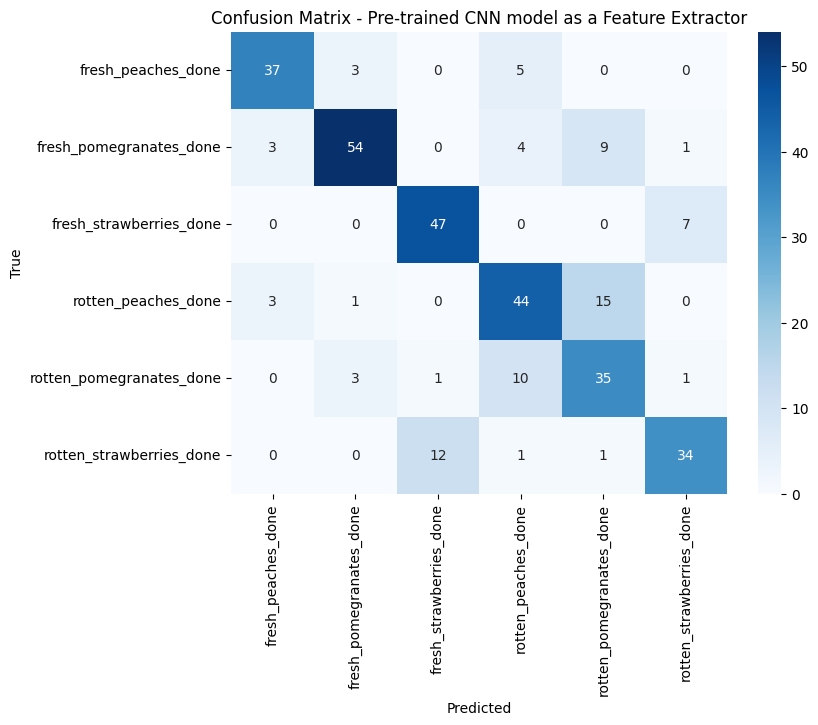

<Figure size 640x480 with 0 Axes>

In [ ]:
display_model_performance_metrics(y_true,y_pred,class_names,'Pre-trained CNN model as a Feature Extractor')
plt.savefig('Pre-trained CNN model as a Feature Extractor confusion matrix')

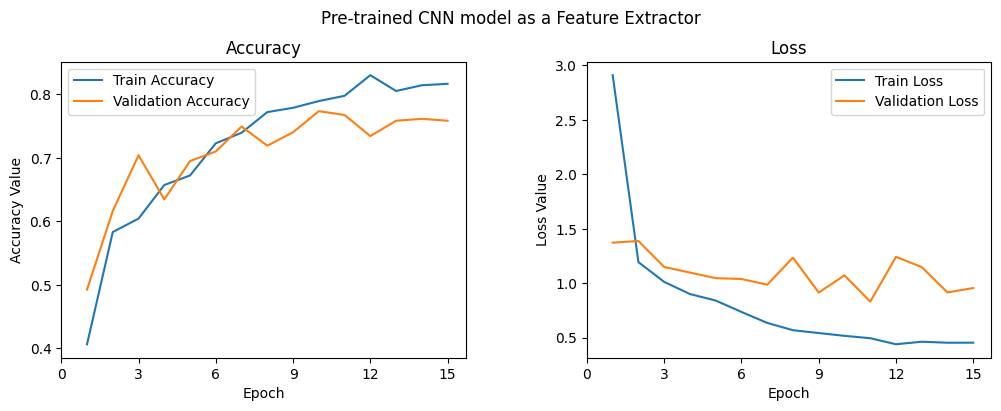

In [ ]:
plot_performance(history, len(history.history['loss']), 3, 'Pre-trained CNN model as a Feature Extractor')
plt.savefig('Pre-trained CNN model as a Feature Extractor plots')

##  Pre-trained CNN model as a Feature Extractor with Image Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_images, train_labels, batch_size=30)
val_generator = val_datagen.flow(val_images, val_labels, batch_size=20)

In [ ]:
model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
              metrics=['accuracy'])

# Compute the number of steps per epoch
steps_per_epoch_train = len(train_images) // BATCH_SIZE
steps_per_epoch_val = len(val_images) // BATCH_SIZE

# Train the model
history = model.fit(train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch_train,
                    validation_data=val_generator, validation_steps=steps_per_epoch_val,
                    verbose=1, callbacks=[early_stop])

Epoch 1/30
41/41 [==============================] - 44s 1s/step - loss: 1.7051 - accuracy: 0.4485 - val_loss: 0.6444 - val_accuracy: 0.7750
Epoch 2/30
41/41 [==============================] - 44s 1s/step - loss: 0.8532 - accuracy: 0.6719 - val_loss: 0.6557 - val_accuracy: 0.7350
Epoch 3/30
41/41 [==============================] - 44s 1s/step - loss: 0.7549 - accuracy: 0.6910 - val_loss: 0.7147 - val_accuracy: 0.6950
Epoch 4/30
41/41 [==============================] - 44s 1s/step - loss: 0.7049 - accuracy: 0.7267 - val_loss: 0.5671 - val_accuracy: 0.7600
Epoch 5/30
41/41 [==============================] - 44s 1s/step - loss: 0.6471 - accuracy: 0.7375 - val_loss: 0.4650 - val_accuracy: 0.8200
Epoch 6/30
41/41 [==============================] - 44s 1s/step - loss: 0.6141 - accuracy: 0.7558 - val_loss: 0.4569 - val_accuracy: 0.7950
Epoch 7/30
41/41 [==============================] - 43s 1s/step - loss: 0.5855 - accuracy: 0.7791 - val_loss: 0.4431 - val_accuracy: 0.8300
Epoch 8/30
41/41 [==

In [ ]:
# Obtain model predictions for the validation set as probabilities
y_pred_probs = model.predict(val_images)

# Convert probabilities into labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Transform true labels back to the original format (one-hot encoded for single class)
y_true = np.argmax(val_labels, axis=1)

11/11 [==============================] - 10s 889ms/step


Accuracy: 0.65
Precision: 0.71
Recall: 0.65
F1 Score: 0.62


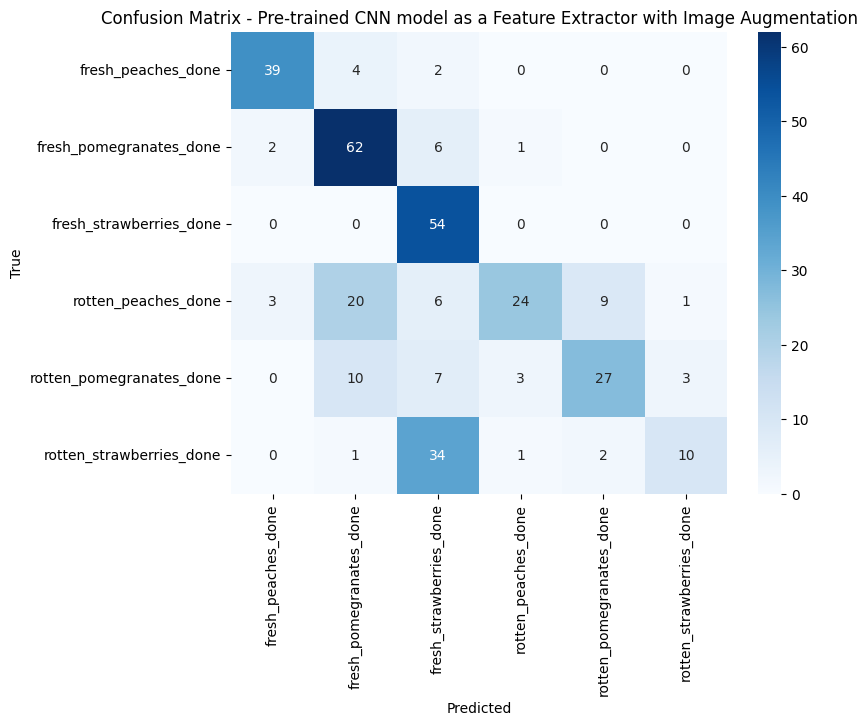

<Figure size 640x480 with 0 Axes>

In [ ]:
display_model_performance_metrics(y_true,y_pred,class_names,'Pre-trained CNN model as a Feature Extractor with Image Augmentation')
plt.savefig('Pre-trained CNN model as a Feature Extractor With Image Augmentation confusion matrix')

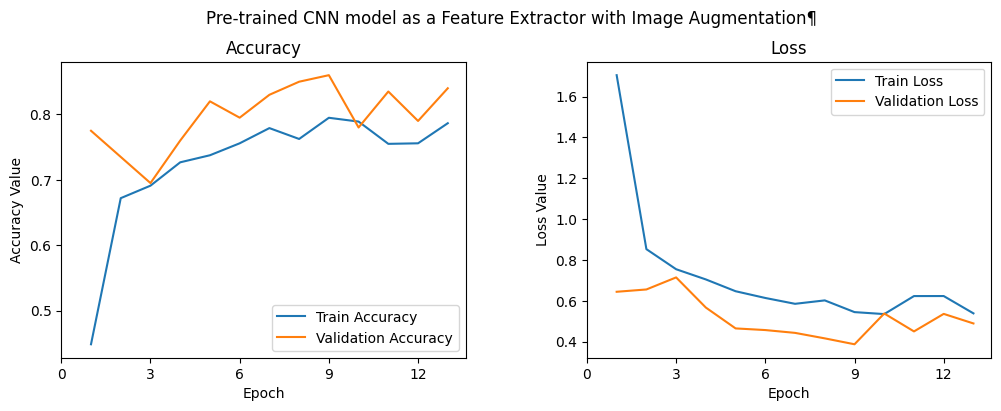

In [ ]:
plot_performance(history, len(history.history['loss']), 3, 'Pre-trained CNN model as a Feature Extractor with Image Augmentation¶')
plt.savefig('Pre-trained CNN model as a Feature Extractor With Image Augmentation plots')

In [ ]:
model.save('fruits_tlearn_img_aug_cnn.h5')

/home/giuseppe/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Pre-trained CNN model with Fine-tuning and Image Augmentation

In [ ]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer object at 0x7f4f3cf84e50>,input_1,False
1,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f4f3c822ee0>,block1_conv1,False
2,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f4f2495de50>,block1_conv2,False
3,<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f4f2523ac40>,block1_pool,False
4,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f50141c80a0>,block2_conv1,False
5,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f4f3c829ee0>,block2_conv2,False
6,<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f4ffc0bd970>,block2_pool,False
7,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f4f3c829580>,block3_conv1,False
8,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f4ffc0bd8b0>,block3_conv2,False
9,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f4ffc0bd610>,block3_conv3,False


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_images, train_labels, batch_size=30)
val_generator = val_datagen.flow(val_images, val_labels, batch_size=20)

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['accuracy'])

history = model.fit(train_generator,
                              steps_per_epoch=steps_per_epoch_train,
                              epochs=epochs,
                              validation_data=val_generator,
                              validation_steps=steps_per_epoch_val,
                              verbose=1,  callbacks=[early_stop])

Epoch 1/30
41/41 [==============================] - 69s 2s/step - loss: 1.7311 - accuracy: 0.2350 - val_loss: 1.2989 - val_accuracy: 0.5300
Epoch 2/30
41/41 [==============================] - 69s 2s/step - loss: 1.2848 - accuracy: 0.4485 - val_loss: 0.7582 - val_accuracy: 0.7000
Epoch 3/30
41/41 [==============================] - 68s 2s/step - loss: 0.9830 - accuracy: 0.5880 - val_loss: 0.6372 - val_accuracy: 0.7700
Epoch 4/30
41/41 [==============================] - 68s 2s/step - loss: 0.6951 - accuracy: 0.7143 - val_loss: 0.5416 - val_accuracy: 0.7300
Epoch 5/30
41/41 [==============================] - 68s 2s/step - loss: 0.6773 - accuracy: 0.7259 - val_loss: 0.4622 - val_accuracy: 0.8200
Epoch 6/30
41/41 [==============================] - 68s 2s/step - loss: 0.5588 - accuracy: 0.7641 - val_loss: 0.4191 - val_accuracy: 0.8400
Epoch 7/30
41/41 [==============================] - 68s 2s/step - loss: 0.4867 - accuracy: 0.8023 - val_loss: 0.7685 - val_accuracy: 0.7250
Epoch 8/30
41/41 [==

In [ ]:
# Obtain model predictions for the validation set as probabilities
y_pred_probs = model.predict(val_images)

# Convert probabilities into labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Transform true labels back to the original format (one-hot encoded for single class)
y_true = np.argmax(val_labels, axis=1)

11/11 [==============================] - 10s 897ms/step


Accuracy: 0.59
Precision: 0.68
Recall: 0.59
F1 Score: 0.53


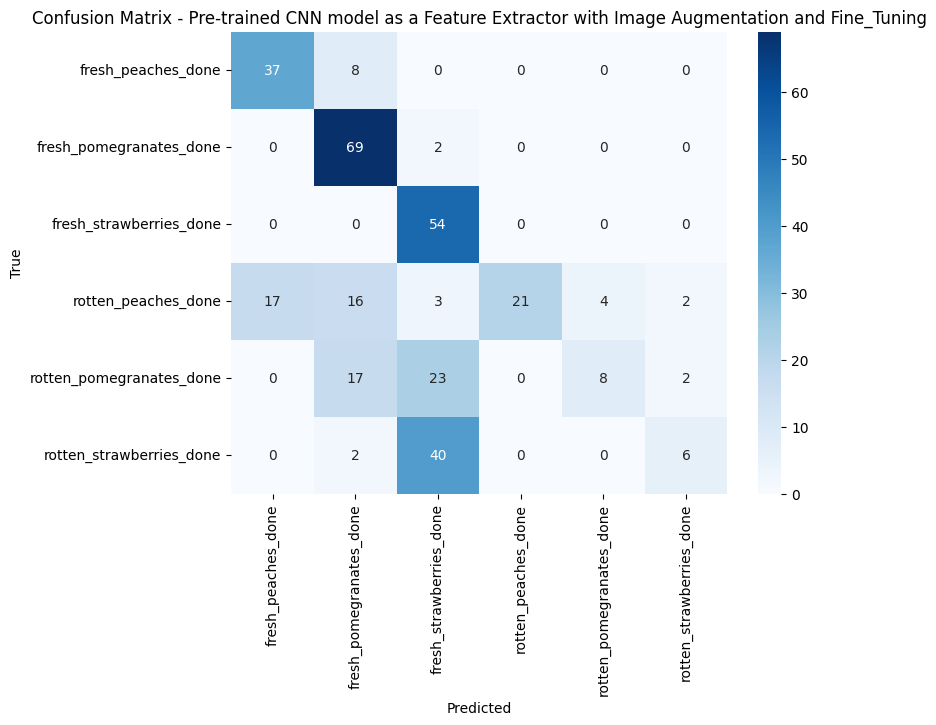

<Figure size 640x480 with 0 Axes>

In [ ]:
display_model_performance_metrics(y_true,y_pred,class_names,'Pre-trained CNN model as a Feature Extractor with Image Augmentation and Fine_Tuning')
plt.savefig('Pre-trained CNN model as a Feature Extractor With Image Augmentation and Fine-Tuning confusion matrix')

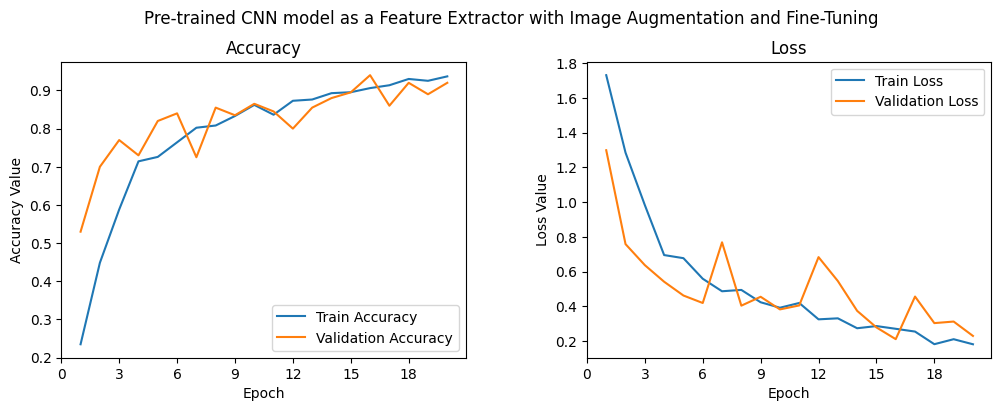

In [ ]:
plot_performance(history, len(history.history['loss']), 3, 'Pre-trained CNN model as a Feature Extractor with Image Augmentation and Fine-Tuning')
plt.savefig('Pre-trained CNN model as a Feature Extractor With Image Augmentation and Fine-Tuning plots')

In [ ]:
model.save('fruits_tlearn_finetune_img_aug_cnn.h5')

/home/giuseppe/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
